In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
from optimizers import *
from topology import * 
from utils import *

In [3]:
zeta, sigma = 10, 0
num_nodes, num_dim = 4, 1
np.random.seed(10)
A, B = generate_consensus_functions(num_nodes, num_dim)

In [10]:
B[0][0] = 1
B[1][0] = 2
B[2][0] = 3
B[3][0] = 4

In [22]:
X = np.ones(shape=(num_dim, num_nodes))
W_ring = FixedMixingMatrix("ring", num_nodes)
W_centr = FixedMixingMatrix("centralized", num_nodes)

In [46]:
errors_centr, _ = optimize_decentralized(X, W_centr, A, B, 0.5, sigma, num_iter=1000)
errors_01, _ = optimize_decentralized(X, W_ring, A, B, 0.5, sigma, num_iter=1000)
errors_001, _ = optimize_decentralized(X, W_ring, A, B, 0.05, sigma, num_iter=1000)

Text(0, 0.5, 'distance to optimum $x^\\star$')

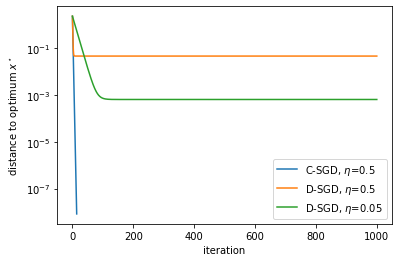

In [58]:
plt.semilogy(errors_centr[:15], label="C-SGD, $\eta$=0.5")
plt.semilogy(errors_01, label="D-SGD, $\eta$=0.5")
plt.semilogy(errors_001, label="D-SGD, $\eta$=0.05")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("distance to optimum $x^\star$")

In [51]:
errors_GT, _ = optimize_GT(X, W_ring, A, B, 0.5, sigma, num_iter=1000)

Text(0, 0.5, 'distance to optimum $x^\\star$')

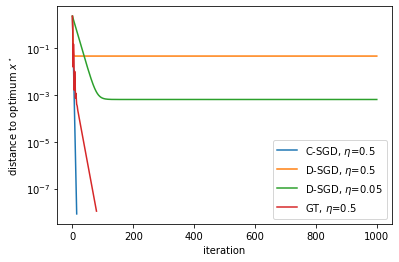

In [62]:
plt.semilogy(errors_centr[:15], label="C-SGD, $\eta$=0.5")
plt.semilogy(errors_01, label="D-SGD, $\eta$=0.5")
plt.semilogy(errors_001, label="D-SGD, $\eta$=0.05")
plt.semilogy(errors_GT[:80], label="GT, $\eta$=0.5")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("distance to optimum $x^\star$")